In [1]:
import pandas as pd  # 数据处理包
import numpy as np  # 数据处理包
from sklearn import metrics  # 混淆句子
from sklearn.preprocessing import LabelEncoder#标签编码
import matplotlib.pyplot as plt  # 图形处理包
import seaborn as sns # 图形处理包
import gc  # 处理缓存
import warnings  # 忽略普通警告，不打印太多东西
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']  # 让图形可以显示中文
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [2]:
df = pd.read_csv('sell.csv',encoding='GBK')
df = df.drop(['道具ID'],axis=1)

In [3]:
df.head()

,购买日期,账号渠道,账号ID,账号等级,账号战力,道具类型,道具名称,本次购买个数,行为后道具总数,消耗代币数
0,2019-12-09,1,ACCOUNT04610,30,116109,材料,修为丸子,8,8,10
1,2019-12-09,1,ACCOUNT04610,30,116109,材料,经验丸子,6,6,10
2,2019-12-09,1,ACCOUNT04610,30,116109,材料,体力丸子,10,38,60
3,2019-12-09,1,ACCOUNT04610,30,116109,材料,经验丸子,12,18,60
4,2019-12-09,1,ACCOUNT04610,30,116109,材料,修为丸子,16,24,60


In [4]:
df_zh = df[['账号ID','账号战力','账号渠道']]
df_zh = df_zh.drop_duplicates().reset_index(drop=True)

In [5]:
print('总消耗代币数为'+str(sum(df.消耗代币数)))
print('参与本次活动的账号数为'+str(df_zh.shape[0]))
print('参与本次活动的账号的平均战力为'+str(round(df_zh.账号战力.mean(),2)))

总消耗代币数为4977240
参与本次活动的账号数为7179
参与本次活动的账号的平均战力为80545.62


# 1. 活动期间消耗总额分析

## 道具类型

([<matplotlib.patches.Wedge at 0x1f26e22c4e0>,
 [Text(0.34105164393624526, 1.0457933716410641, '副本门票'),
  Text(-1.0005071009308741, -0.45714936397954004, '奖池券'),
  Text(0.5706480550722085, -0.940404592312429, '材料'),
  Text(1.0784168567398642, -0.2168342295379389, '英雄秘籍')],
 [Text(0.18602816941977013, 0.570432748167853, '40.0%'),
  Text(-0.5457311459622949, -0.24935419853429452, '33.7%'),
  Text(0.3112625754939319, -0.512947959443143, '20.0%'),
  Text(0.5882273764035622, -0.11827321611160302, '6.3%')])

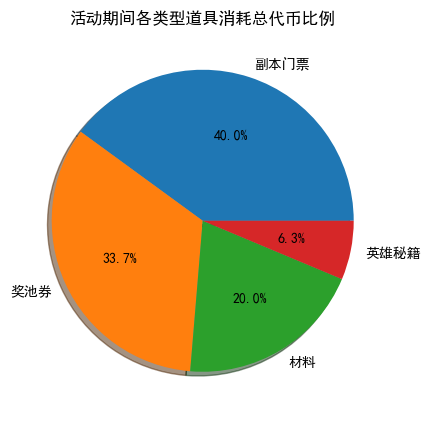

In [6]:
group = pd.DataFrame(df['消耗代币数'].groupby(df['道具类型']).sum())
fig,ax = plt.subplots(figsize=(8,5),dpi=100)
plt.title("活动期间各类型道具消耗总代币比例")
plt.pie(group.消耗代币数, labels = group.index, shadow=True,autopct='%1.1f%%')

## 各道具类型具体分析

([<matplotlib.patches.Wedge at 0x1f2704b9b70>,
 [Text(1.0566059881390402, 0.30591467082950213, '英雄A'),
  Text(0.7902310997161184, 0.7652024627779594, '英雄B'),
  Text(0.13792763013870868, 1.091318454368073, '英雄C'),
  Text(-0.6330434384682749, -0.899586574495342, '英雄D')],
 [Text(0.5763305389849309, 0.16686254772518297, '9.0%'),
  Text(0.43103514529970094, 0.41738316151525057, '6.5%'),
  Text(0.075233252802932, 0.5952646114734943, '15.0%'),
  Text(-0.3452964209826954, -0.49068358608836826, '69.5%')])

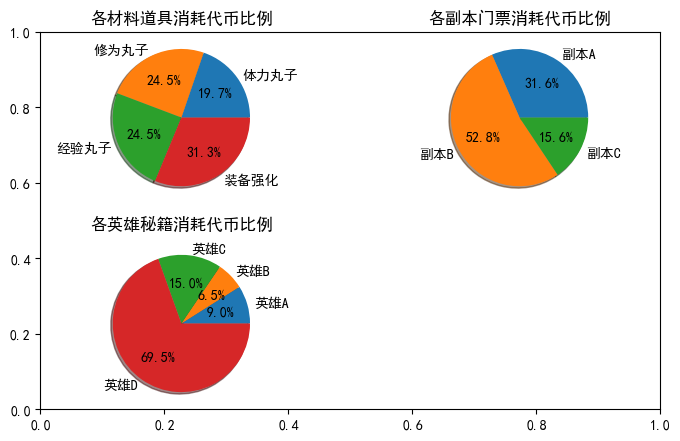

In [7]:
df1 = df[df['道具类型'] == '材料']
df2 = df[df['道具类型'] == '副本门票']
df3 = df[df['道具类型'] == '奖池券']
df4 = df[df['道具类型'] == '英雄秘籍']

group = pd.DataFrame(df1['消耗代币数'].groupby(df1['道具名称']).sum())
fig,ax = plt.subplots(figsize=(8,5),dpi=100)
ax = fig.add_subplot(221)
plt.title("各材料道具消耗代币比例")
plt.pie(group.消耗代币数, labels = group.index, shadow=True,autopct='%1.1f%%')
group = pd.DataFrame(df2['消耗代币数'].groupby(df2['道具名称']).sum())
ax = fig.add_subplot(222)
plt.title("各副本门票消耗代币比例")
plt.pie(group.消耗代币数, labels = group.index, shadow=True,autopct='%1.1f%%')
group = pd.DataFrame(df4['消耗代币数'].groupby(df4['道具名称']).sum())
ax = fig.add_subplot(223)
plt.title("各英雄秘籍消耗代币比例")
plt.pie(group.消耗代币数, labels = group.index, shadow=True,autopct='%1.1f%%')

## 账号战力分布

Text(0.5, 1.0, '参与消费的账号战力分布')

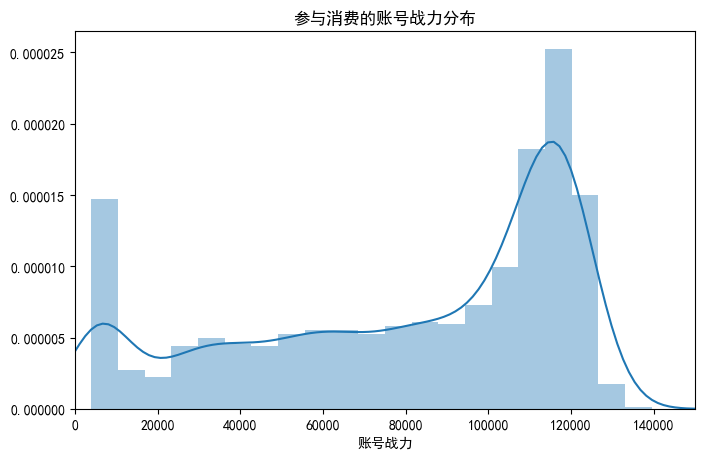

In [8]:
fig,ax = plt.subplots(figsize=(8,5),dpi=100)
sns.distplot(df_zh['账号战力'] )
plt.xlim([0,150000])
plt.title('参与消费的账号战力分布')

# 按账号战力分群，进一步查看

In [9]:
df_low = df[df.账号战力< 45000]
df_med = df[(df.账号战力>=45000)&(df.账号战力<100000)]
df_high = df[(df.账号战力>=100000)]

([<matplotlib.patches.Wedge at 0x1f27065f9b0>,
 [Text(0.2789051469926446, 1.0640544718110119, '副本门票'),
  Text(-0.8977493817087786, -0.6356461654423048, '奖池券'),
  Text(0.7119743517705971, -0.8385061254521867, '材料'),
  Text(1.0844244121636215, -0.18445512815745777, '英雄秘籍')],
 [Text(0.15213008017780616, 0.5803933482605519, '41.8%'),
  Text(-0.489681480932061, -0.34671609024125716, '35.9%'),
  Text(0.38834964642032566, -0.4573669775193745, '16.9%'),
  Text(0.5915042248165208, -0.10061188808588604, '5.4%')])

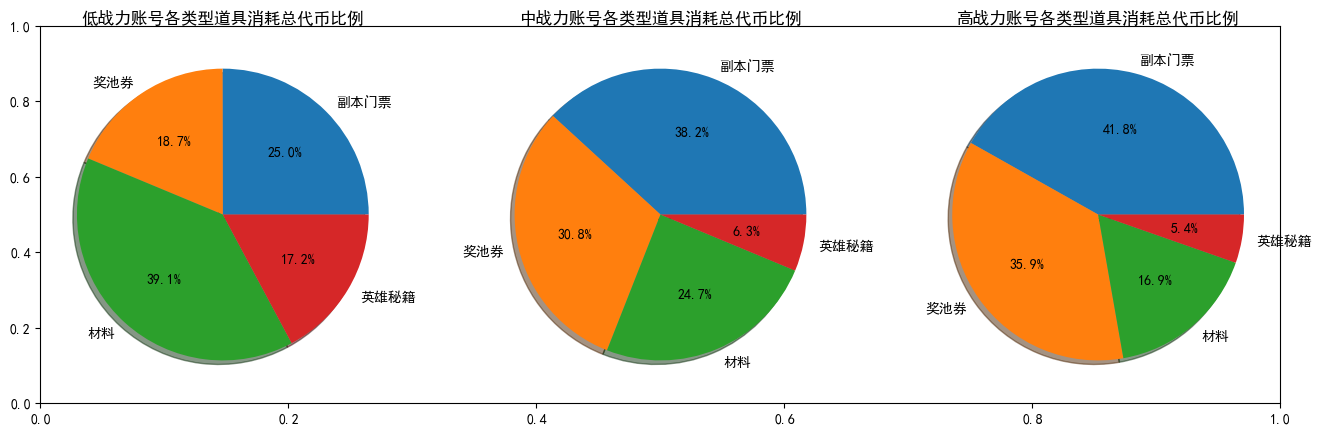

In [10]:
group = pd.DataFrame(df_low['消耗代币数'].groupby(df_low['道具类型']).sum())
fig,ax = plt.subplots(figsize=(16,5),dpi=100)
ax = fig.add_subplot(131)
plt.title("低战力账号各类型道具消耗总代币比例")
plt.pie(group.消耗代币数, labels = group.index, shadow=True,autopct='%1.1f%%')
group = pd.DataFrame(df_med['消耗代币数'].groupby(df_med['道具类型']).sum())
ax = fig.add_subplot(132)
plt.title("中战力账号各类型道具消耗总代币比例")
plt.pie(group.消耗代币数, labels = group.index, shadow=True,autopct='%1.1f%%')
group = pd.DataFrame(df_high['消耗代币数'].groupby(df_high['道具类型']).sum())
ax = fig.add_subplot(133)
plt.title("高战力账号各类型道具消耗总代币比例")
plt.pie(group.消耗代币数, labels = group.index, shadow=True,autopct='%1.1f%%')

## 账号渠道

([<matplotlib.patches.Wedge at 0x1f27086e208>,
 [Text(-0.8479879098857456, 0.7006543403759123, '1'),
  Text(0.8479879754857351, -0.7006542609815518, '2')],
 [Text(-0.4625388599376793, 0.3821750947504976, '78.0%'),
  Text(0.4625388957194918, -0.38217505144448277, '22.0%')])

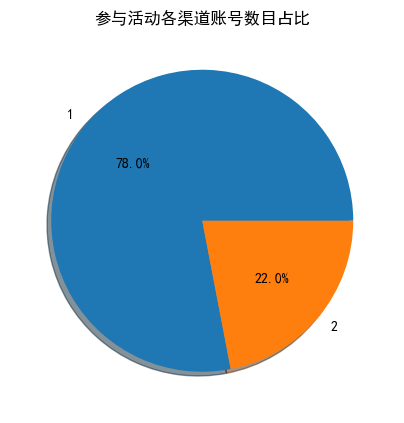

In [11]:
group = pd.DataFrame(df_zh['账号ID'].groupby(df_zh['账号渠道']).count())
group.columns = ['账号数目']
fig,ax = plt.subplots(figsize=(8,5),dpi=100)
plt.title("参与活动各渠道账号数目占比")
plt.pie(group.账号数目,labels = group.index, shadow=True,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1f2708ac710>,
 [Text(-0.7210440049640312, 0.8307198943720021, '1'),
  Text(0.7210440827416376, -0.8307198268629867, '2')],
 [Text(-0.3932967299803806, 0.45311994238472836, '72.8%'),
  Text(0.39329677240452954, -0.45311990556162907, '27.2%')])

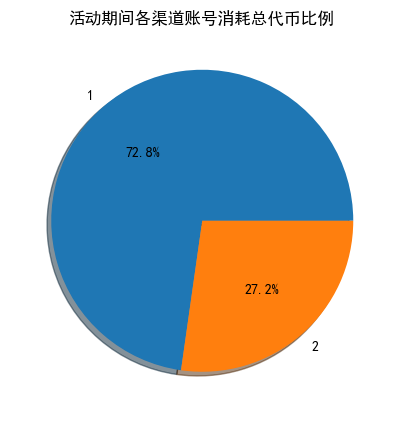

In [12]:
group = pd.DataFrame(df['消耗代币数'].groupby(df['账号渠道']).sum())
fig,ax = plt.subplots(figsize=(8,5),dpi=100)
plt.title("活动期间各渠道账号消耗总代币比例")
plt.pie(group.消耗代币数, labels = group.index, shadow=True,autopct='%1.1f%%')

## 各渠道账号对不同类型道具的购买倾向

([<matplotlib.patches.Wedge at 0x1f27095afd0>,
 [Text(0.34930828989581203, 1.043064580268194, '副本门票'),
  Text(-1.0044780338452846, -0.44835686625980364, '奖池券'),
  Text(0.4862099795724222, -0.986711637594381, '材料'),
  Text(1.0555870634953899, -0.309412267664325, '英雄秘籍')],
 [Text(0.19053179448862473, 0.5689443165099239, '39.7%'),
  Text(-0.5478971093701551, -0.24455829068716559, '33.9%'),
  Text(0.26520544340313934, -0.5382063477787532, '17.3%'),
  Text(0.5757747619065763, -0.16877032781690451, '9.1%')])

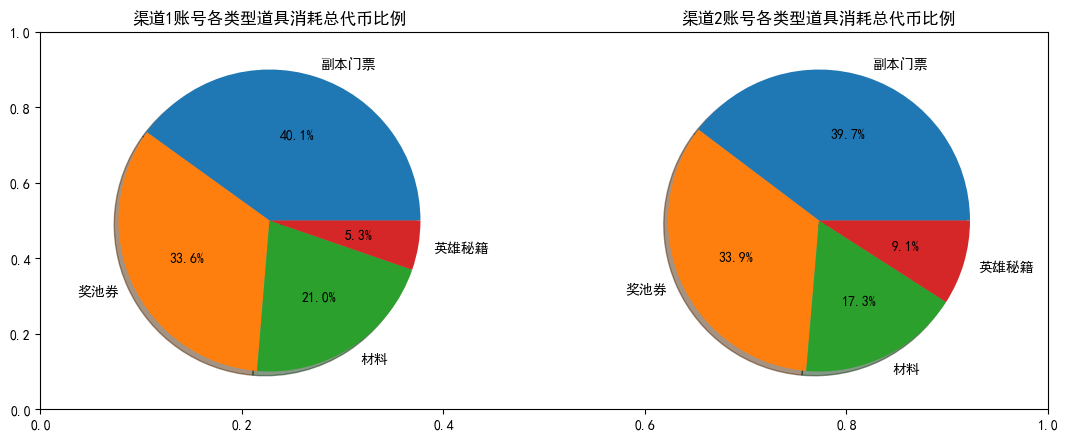

In [13]:
group = pd.DataFrame(df[df.账号渠道==1]['消耗代币数'].groupby(df[df.账号渠道==1]['道具类型']).sum())
fig,ax = plt.subplots(figsize=(13,5),dpi=100)
ax = fig.add_subplot(121)
plt.title("渠道1账号各类型道具消耗总代币比例")
plt.pie(group.消耗代币数, labels = group.index, shadow=True,autopct='%1.1f%%')
group = pd.DataFrame(df[df.账号渠道==2]['消耗代币数'].groupby(df[df.账号渠道==2]['道具类型']).sum())
ax = fig.add_subplot(122)
plt.title("渠道2账号各类型道具消耗总代币比例")
plt.pie(group.消耗代币数, labels = group.index, shadow=True,autopct='%1.1f%%')

# 2. 结合时间分析

## 每日消耗总代币数

In [14]:
group = pd.DataFrame(df['消耗代币数'].groupby(df['购买日期']).sum())
group1 = pd.DataFrame(df[df['道具类型']=='材料']['消耗代币数'].groupby(df['购买日期']).sum())
group2 = pd.DataFrame(df[df['道具类型']=='副本门票']['消耗代币数'].groupby(df['购买日期']).sum())
group3 = pd.DataFrame(df[df['道具类型']=='奖池券']['消耗代币数'].groupby(df['购买日期']).sum())
group4 = pd.DataFrame(df[df['道具类型']=='英雄秘籍']['消耗代币数'].groupby(df['购买日期']).sum())
total = pd.concat([group,group1,group2,group3,group4],axis=1)
total.columns = ['总消耗代币数','材料消耗代币数','副本门票消耗代币数','奖池券消耗代币数','英雄秘籍消耗代币数']

Text(0.5, 1.0, '消耗代币数与时间的关系')

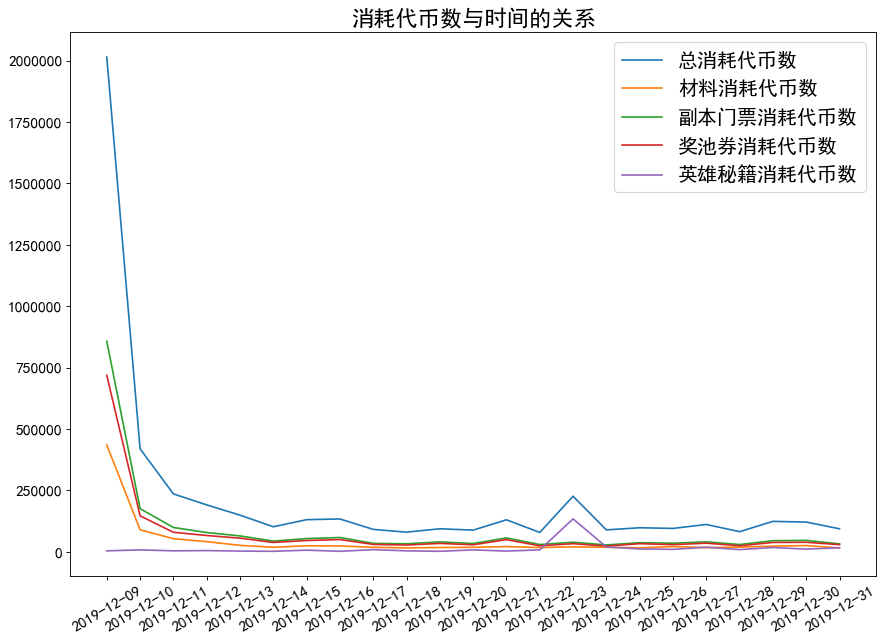

In [15]:
fig,ax = plt.subplots(figsize=(13,9),dpi=80)
plt.plot(total.index,total.总消耗代币数)
plt.plot(total.index,total.材料消耗代币数)
plt.plot(total.index,total.副本门票消耗代币数)
plt.plot(total.index,total.奖池券消耗代币数)
plt.plot(total.index,total.英雄秘籍消耗代币数)
plt.legend(prop={'size':18})
plt.xticks(rotation=30,size=14)
plt.yticks(size=14)
plt.title('消耗代币数与时间的关系',size=20)

### 结合账号渠道分析

Text(0.5, 1.0, '不同渠道消耗代币数与时间的关系')

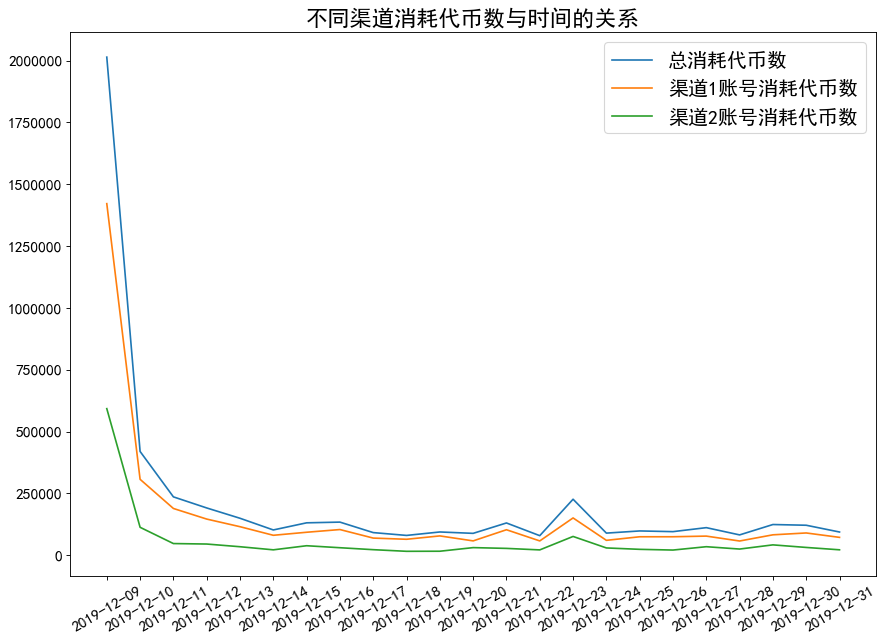

In [16]:
group = pd.DataFrame(df['消耗代币数'].groupby(df['购买日期']).sum())
group1 = pd.DataFrame(df[df['账号渠道']==1]['消耗代币数'].groupby(df['购买日期']).sum())
group2 = pd.DataFrame(df[df['账号渠道']==2]['消耗代币数'].groupby(df['购买日期']).sum())
total = pd.concat([group,group1,group2],axis=1)
total.columns = ['总消耗代币数','渠道1账号消耗代币数','渠道2账号消耗代币数']

fig,ax = plt.subplots(figsize=(13,9),dpi=80)
plt.plot(total.index,total.总消耗代币数)
plt.plot(total.index,total.渠道1账号消耗代币数)
plt.plot(total.index,total.渠道2账号消耗代币数)
plt.legend(prop={'size':18})
plt.xticks(rotation=30,size=14)
plt.yticks(size=14)
plt.title('不同渠道消耗代币数与时间的关系',size=20)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 <a list of 11 Text yticklabel objects>)

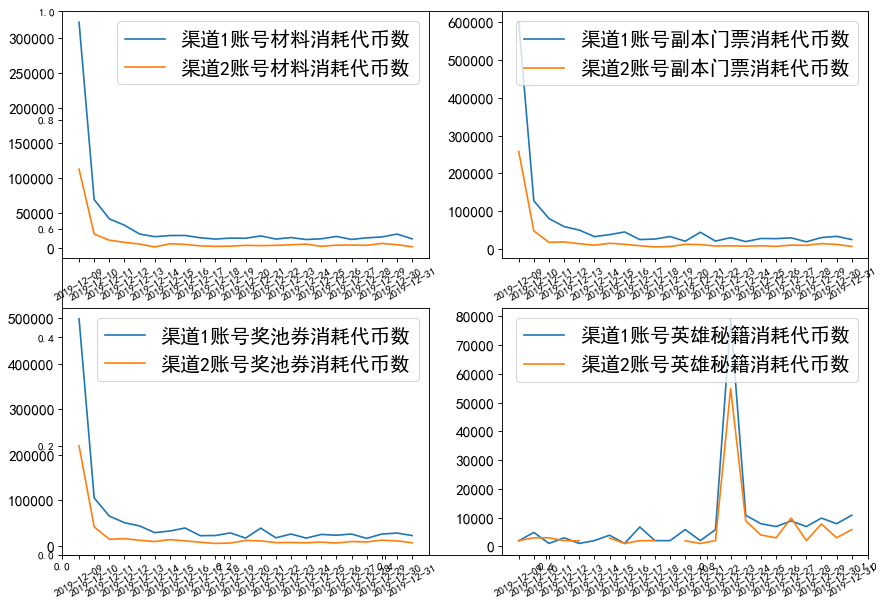

In [17]:
df1 = df[df['道具类型'] == '材料']
group = pd.DataFrame(df1['消耗代币数'].groupby(df1['购买日期']).sum())
group1 = pd.DataFrame(df1[df1['账号渠道']==1]['消耗代币数'].groupby(df1['购买日期']).sum())
group2 = pd.DataFrame(df1[df1['账号渠道']==2]['消耗代币数'].groupby(df1['购买日期']).sum())
total = pd.concat([group,group1,group2],axis=1)
total.columns = ['总消耗代币数','渠道1账号材料消耗代币数','渠道2账号材料消耗代币数']
fig,ax = plt.subplots(figsize=(13,9),dpi=80)
ax = fig.add_subplot(221)
#plt.plot(total.index,total.总消耗代币数)
plt.plot(total.index,total.渠道1账号材料消耗代币数)
plt.plot(total.index,total.渠道2账号材料消耗代币数)
plt.legend(prop={'size':18})
plt.xticks(rotation=30,size=10)
plt.yticks(size=14)
#plt.title('不同渠道材料消耗代币数与时间的关系',size=20)

df2 = df[df['道具类型'] == '副本门票']
group = pd.DataFrame(df2['消耗代币数'].groupby(df2['购买日期']).sum())
group1 = pd.DataFrame(df2[df2['账号渠道']==1]['消耗代币数'].groupby(df2['购买日期']).sum())
group2 = pd.DataFrame(df2[df2['账号渠道']==2]['消耗代币数'].groupby(df2['购买日期']).sum())
total = pd.concat([group,group1,group2],axis=1)
total.columns = ['总消耗代币数','渠道1账号副本门票消耗代币数','渠道2账号副本门票消耗代币数']
ax = fig.add_subplot(222)
#plt.plot(total.index,total.总消耗代币数)
plt.plot(total.index,total.渠道1账号副本门票消耗代币数)
plt.plot(total.index,total.渠道2账号副本门票消耗代币数)
plt.legend(prop={'size':18})
plt.xticks(rotation=30,size=10)
plt.yticks(size=14)
#plt.title('不同渠道副本门票消耗代币数与时间的关系',size=20)

df3 = df[df['道具类型'] == '奖池券']
group = pd.DataFrame(df3['消耗代币数'].groupby(df3['购买日期']).sum())
group1 = pd.DataFrame(df3[df3['账号渠道']==1]['消耗代币数'].groupby(df3['购买日期']).sum())
group2 = pd.DataFrame(df3[df3['账号渠道']==2]['消耗代币数'].groupby(df3['购买日期']).sum())
total = pd.concat([group,group1,group2],axis=1)
total.columns = ['总消耗代币数','渠道1账号奖池券消耗代币数','渠道2账号奖池券消耗代币数']
ax = fig.add_subplot(223)
#plt.plot(total.index,total.总消耗代币数)
plt.plot(total.index,total.渠道1账号奖池券消耗代币数)
plt.plot(total.index,total.渠道2账号奖池券消耗代币数)
plt.legend(prop={'size':18})
plt.xticks(rotation=30,size=10)
plt.yticks(size=14)
#plt.title('不同渠道奖池券消耗代币数与时间的关系',size=20)

df4 = df[df['道具类型'] == '英雄秘籍']
group = pd.DataFrame(df4['消耗代币数'].groupby(df4['购买日期']).sum())
group1 = pd.DataFrame(df4[df4['账号渠道']==1]['消耗代币数'].groupby(df4['购买日期']).sum())
group2 = pd.DataFrame(df4[df4['账号渠道']==2]['消耗代币数'].groupby(df4['购买日期']).sum())
total = pd.concat([group,group1,group2],axis=1)
total.columns = ['总消耗代币数','渠道1账号英雄秘籍消耗代币数','渠道2账号英雄秘籍消耗代币数']
ax = fig.add_subplot(224)
#plt.plot(total.index,total.总消耗代币数)
plt.plot(total.index,total.渠道1账号英雄秘籍消耗代币数)
plt.plot(total.index,total.渠道2账号英雄秘籍消耗代币数)
plt.legend(prop={'size':18})
plt.xticks(rotation=30,size=10)
plt.yticks(size=14)
#plt.title('不同渠道奖池券消耗代币数与时间的关系',size=20)

## 每日有过付费行为的账号个数

In [18]:
df_t = df[['购买日期','账号ID','账号渠道']]
df_t = df_t.drop_duplicates().reset_index(drop=True)
df_s = df[['购买日期','账号ID','账号渠道','道具类型']]
df_s = df_s.drop_duplicates().reset_index(drop=True)

In [19]:
group = pd.DataFrame(df_t['账号ID'].groupby(df_t['购买日期']).count())
group1 = pd.DataFrame(df_s[df_s['道具类型']=='材料']['账号ID'].groupby(df_s['购买日期']).count())
group2 = pd.DataFrame(df_s[df_s['道具类型']=='副本门票']['账号ID'].groupby(df_s['购买日期']).count())
group3 = pd.DataFrame(df_s[df_s['道具类型']=='奖池券']['账号ID'].groupby(df_s['购买日期']).count())
group4 = pd.DataFrame(df_s[df_s['道具类型']=='英雄秘籍']['账号ID'].groupby(df_s['购买日期']).count())
total = pd.concat([group,group1,group2,group3,group4],axis=1)
total.columns = ['总付费账号数','材料付费账号数','副本门票付费账号数','奖池券付费账号数','英雄秘籍付费账号数']

Text(0.5, 1.0, '有过付费行为的账号数与时间的关系')

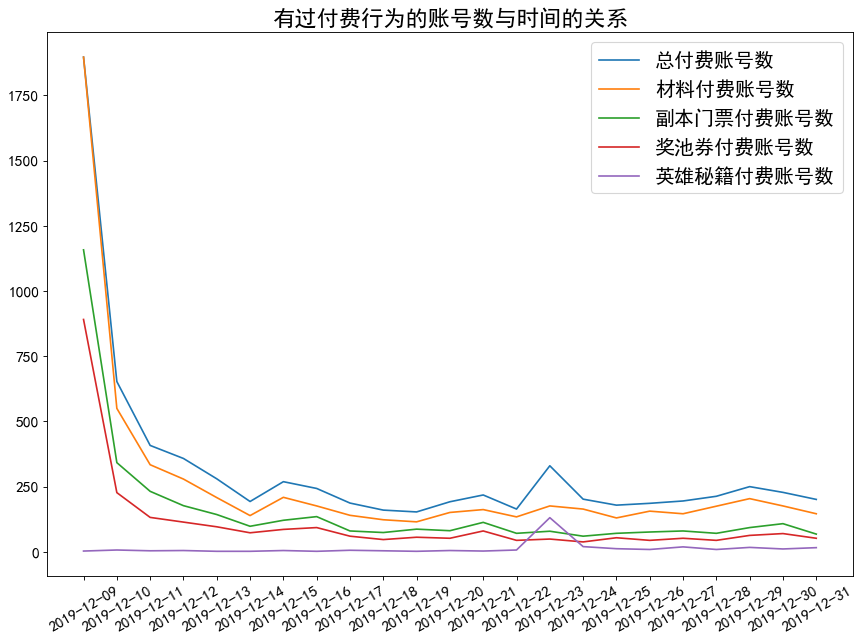

In [20]:
fig,ax = plt.subplots(figsize=(13,9),dpi=80)
plt.plot(total.index,total.总付费账号数)
plt.plot(total.index,total.材料付费账号数)
plt.plot(total.index,total.副本门票付费账号数)
plt.plot(total.index,total.奖池券付费账号数)
plt.plot(total.index,total.英雄秘籍付费账号数)
plt.legend(prop={'size':18})
plt.xticks(rotation=30,size=14)
plt.yticks(size=14)
plt.title('有过付费行为的账号数与时间的关系',size=20)

## 不同渠道每日付费账号数

Text(0.5, 1.0, '不同渠道付费账号数与时间的关系')

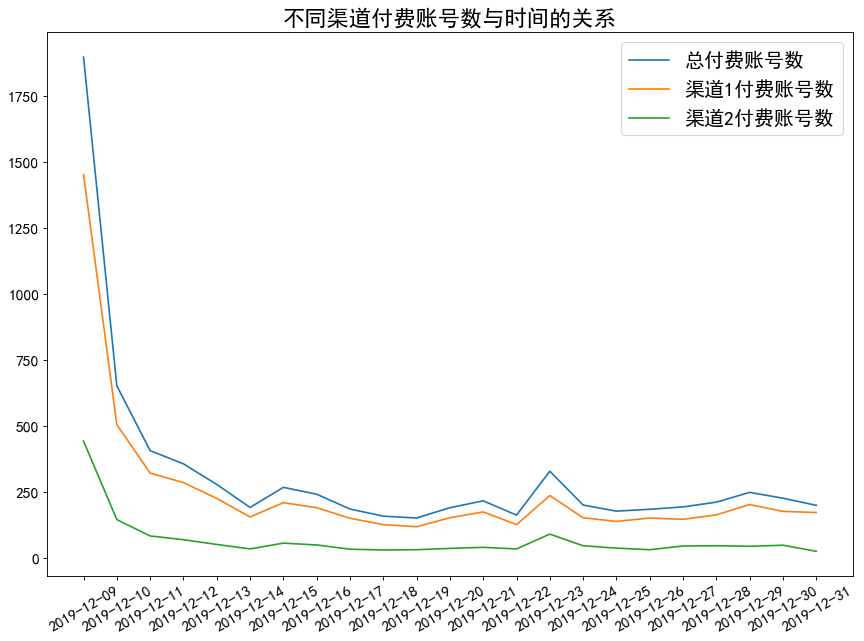

In [21]:
group = pd.DataFrame(df_t['账号ID'].groupby(df_t['购买日期']).count())
group1 = pd.DataFrame(df_t[df_t['账号渠道']==1]['账号ID'].groupby(df_t['购买日期']).count())
group2 = pd.DataFrame(df_t[df_t['账号渠道']==2]['账号ID'].groupby(df_t['购买日期']).count())
total = pd.concat([group,group1,group2],axis=1)
total.columns = ['总付费账号数','渠道1付费账号数','渠道2付费账号数']

fig,ax = plt.subplots(figsize=(13,9),dpi=80)
plt.plot(total.index,total.总付费账号数)
plt.plot(total.index,total.渠道1付费账号数)
plt.plot(total.index,total.渠道2付费账号数)
plt.legend(prop={'size':18})
plt.xticks(rotation=30,size=14)
plt.yticks(size=14)
plt.title('不同渠道付费账号数与时间的关系',size=20)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 <a list of 10 Text yticklabel objects>)

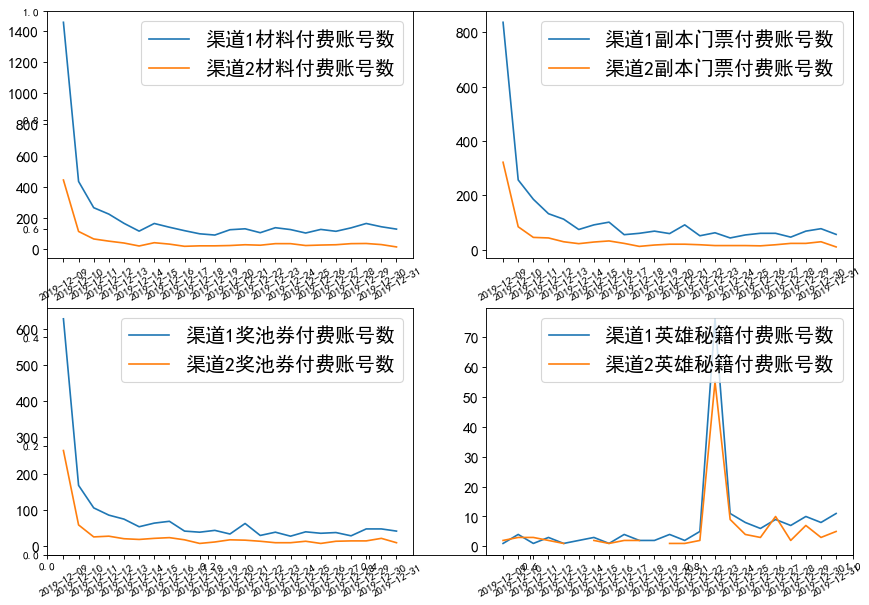

In [22]:
df1 = df_s[df_s['道具类型'] == '材料']
group = pd.DataFrame(df1['账号ID'].groupby(df1['购买日期']).count())
group1 = pd.DataFrame(df1[df1['账号渠道']==1]['账号ID'].groupby(df1['购买日期']).count())
group2 = pd.DataFrame(df1[df1['账号渠道']==2]['账号ID'].groupby(df1['购买日期']).count())
total = pd.concat([group,group1,group2],axis=1)
total.columns = ['材料付费账号数','渠道1材料付费账号数','渠道2材料付费账号数']
fig,ax = plt.subplots(figsize=(13,9),dpi=80)
ax = fig.add_subplot(221)
#plt.plot(total.index,total.总消耗代币数)
plt.plot(total.index,total.渠道1材料付费账号数)
plt.plot(total.index,total.渠道2材料付费账号数)
plt.legend(prop={'size':18})
plt.xticks(rotation=30,size=10)
plt.yticks(size=14)
#plt.title('不同渠道材料消耗代币数与时间的关系',size=20)

df2 = df_s[df_s['道具类型'] == '副本门票']
group = pd.DataFrame(df2['账号ID'].groupby(df2['购买日期']).count())
group1 = pd.DataFrame(df2[df2['账号渠道']==1]['账号ID'].groupby(df2['购买日期']).count())
group2 = pd.DataFrame(df2[df2['账号渠道']==2]['账号ID'].groupby(df2['购买日期']).count())
total = pd.concat([group,group1,group2],axis=1)
total.columns = ['副本门票付费账号数','渠道1副本门票付费账号数','渠道2副本门票付费账号数']
ax = fig.add_subplot(222)
#plt.plot(total.index,total.总消耗代币数)
plt.plot(total.index,total.渠道1副本门票付费账号数)
plt.plot(total.index,total.渠道2副本门票付费账号数)
plt.legend(prop={'size':18})
plt.xticks(rotation=30,size=10)
plt.yticks(size=14)
#plt.title('不同渠道副本门票消耗代币数与时间的关系',size=20)

df3 = df_s[df_s['道具类型'] == '奖池券']
group = pd.DataFrame(df3['账号ID'].groupby(df3['购买日期']).sum())
group1 = pd.DataFrame(df3[df3['账号渠道']==1]['账号ID'].groupby(df3['购买日期']).count())
group2 = pd.DataFrame(df3[df3['账号渠道']==2]['账号ID'].groupby(df3['购买日期']).count())
total = pd.concat([group,group1,group2],axis=1)
total.columns = ['奖池券付费账号数','渠道1奖池券付费账号数','渠道2奖池券付费账号数']
ax = fig.add_subplot(223)
#plt.plot(total.index,total.总消耗代币数)
plt.plot(total.index,total.渠道1奖池券付费账号数)
plt.plot(total.index,total.渠道2奖池券付费账号数)
plt.legend(prop={'size':18})
plt.xticks(rotation=30,size=10)
plt.yticks(size=14)
#plt.title('不同渠道奖池券消耗代币数与时间的关系',size=20)

df4 = df_s[df_s['道具类型'] == '英雄秘籍']
group = pd.DataFrame(df4['账号ID'].groupby(df4['购买日期']).count())
group1 = pd.DataFrame(df4[df4['账号渠道']==1]['账号ID'].groupby(df4['购买日期']).count())
group2 = pd.DataFrame(df4[df4['账号渠道']==2]['账号ID'].groupby(df4['购买日期']).count())
total = pd.concat([group,group1,group2],axis=1)
total.columns = ['英雄秘籍付费账号数','渠道1英雄秘籍付费账号数','渠道2英雄秘籍付费账号数']
ax = fig.add_subplot(224)
#plt.plot(total.index,total.总消耗代币数)
plt.plot(total.index,total.渠道1英雄秘籍付费账号数)
plt.plot(total.index,total.渠道2英雄秘籍付费账号数)
plt.legend(prop={'size':18})
plt.xticks(rotation=30,size=10)
plt.yticks(size=14)
#plt.title('不同渠道奖池券消耗代币数与时间的关系',size=20